# Week 8
## Overview

It's the last time we meet in class for exercises! And to celebrate this mile-stone, I've put together an very nice little set of exercises. And if you're behind, don't worry. The workload is low!

  - Part A: First, we play around with sentiment analysis
  - That's it!


# Part A: Sentiment analysis

Sentiment analysis is another highly useful technique which we'll use to make sense of the Wiki
data. Further, experience shows that it might well be very useful when you get to the project stage of the class.



> **Video Lecture**: Uncle Sune talks about sentiment and his own youthful adventures.



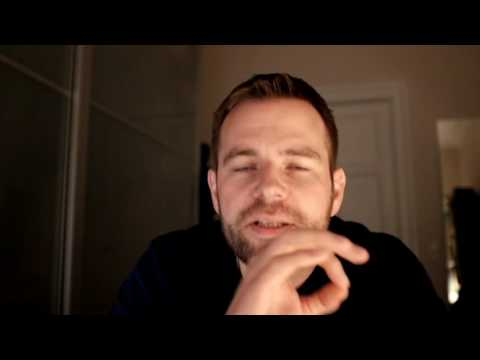

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("JuYcaYYlfrI",width=800, height=450)

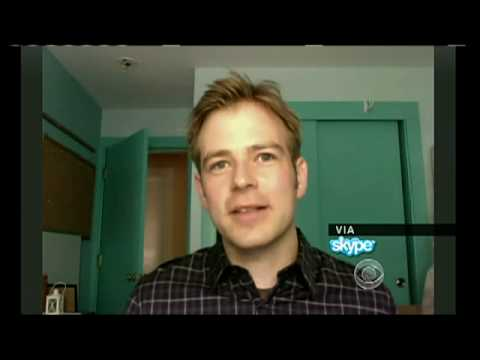

In [2]:
# There's also this one from 2010 with young Sune's research
YouTubeVideo("hY0UCD5UiiY",width=800, height=450)

> Reading: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) 


*Exercise*: Sentiment distribution. 
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).
> * Iterage over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property.
> * Calculate the average sentiment across all the pages. Also calculate the median, variance, 25th percentile, 75th percentile.
> * Remember histograms? Create a histogram of all of the artists's associated page-sentiments. (And make it a nice histogram - use your histogram making skills from Week 2). Add the mean, meadian, ect from above to your plot.
> * Who are the 10 artists with happiest and saddest pages?

<div class="alert alert-block alert-info">
As long as you get the plots right, it's OK to use LLM help here.
</div>


In [3]:
import pandas as pd
import numpy as np

sentiment_df = pd.read_csv("data/pone.0026752.s001.txt", sep='\t', header=None, names=['word', 'happiness_rank', 'happiness_average', 'happiness_standard_deviation', 'twitter_rank', 'google_rank', 'nyt_rank', 'lyrics_rank'])

In [4]:
sentiment_df.head()

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,labMIT-1.0.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,language assessment by Mechanical Turk 1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
3,laughter,1,8.50,0.9313,3600,--,--,1728
4,happiness,2,8.44,0.9723,1853,2458,--,1230


> **Describe briefly how the list was generated.**

> The list is generated of peoples happiness score of the 10.000 most common english words. \
> The scores quantify how positive or negative a word tends to be perceived, allowing sentence or document-level sentiment analysis by averaging across word scores.

In [5]:
sentiment_df = sentiment_df.iloc[3:]
sentiment_df.replace({'--': {pd.NA}}, inplace=True)

sentiment_df['happiness_average'] = pd.to_numeric(sentiment_df['happiness_average'], errors='coerce')
sentiment_df.dropna(subset=['word', 'happiness_average'], inplace=True)

In [6]:
sentiment_df.head()

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
3,laughter,1,8.50,0.9313,3600,{<NA>},{<NA>},1728
4,happiness,2,8.44,0.9723,1853,2458,{<NA>},1230
5,love,3,8.42,1.1082,25,317,328,23
6,happy,4,8.30,0.9949,65,1372,1313,375
7,laughed,5,8.26,1.1572,3334,3542,{<NA>},2332


In [7]:
# Fast lookup: word -> score
word_scores = dict(zip(sentiment_df['word'], sentiment_df['happiness_average']))

# Example lookups: access single keys or use .get for safe lookup (avoids KeyError)
print("happy:", word_scores.get('happy'))
print("laugh:", word_scores.get('laugh'))

happy: 8.3
laugh: 8.22


In [8]:
# Scores for multiple words at once:
words = ['happy', 'laugh']
[word_scores.get(w) for w in words]

[8.3, 8.22]

> **Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).**

In [9]:
import numpy as np

# We gather our list of tokens, which is the word column lowercased:
tokens = sentiment_df['word'].str.lower().tolist()

# We have to make a function that calculates sentiment given a list of tokens:
def sentiment_calculator(token_list, sentiment_df):
    from nltk.probability import FreqDist
    from nltk.tokenize import word_tokenize

    if not isinstance(token_list, list):
        # Convert sentence to a list of tokens:
        token_list = [word.lower() for word in word_tokenize(token_list)]

    else:
        # Ensure all tokens are lower case:
        token_list = [word.lower() for word in token_list]

    
    # Find all matching words with our token_list with df word list:
    matching_words = set(token_list).intersection(set(sentiment_df["word"]))

    if len(matching_words) == 0:
        # No matches — return NaN values to avoid warning
        return {
            "happiness_avg_scores": [],
            "mean_happiness": np.nan,
            "hapiness_std_scores": [],
            "std_happiness": np.nan
        }

    # Now calculate sentiment based on the happiness_average of the matching words:
    happiness_avg_scores = sentiment_df[sentiment_df["word"].isin(matching_words)]["happiness_average"].astype(float).values
    mean_score = np.nanmean(happiness_avg_scores)

    happiness_std = sentiment_df[sentiment_df["word"].isin(matching_words)]["happiness_standard_deviation"].astype(float).values
    std_score = np.nanmean(happiness_std)

    return {
        "happiness_avg_scores": happiness_avg_scores,
        "mean_happiness": round(float(mean_score), 2),
        "hapiness_std_scores": happiness_std,
        "std_happiness": round(float(std_score), 2)
    }

> **Iterage over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property.**

In [10]:
# Now for the genre documents:
import os
import pickle
import re

directory = "../Week_4/data/rock_performers/"

all_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".pkl")]

all_performers = [os.path.splitext(os.path.basename(f))[0] for f in all_paths]

performer_set = set(all_performers)
    
opened_files = {}

for file_path in all_paths:
    performer = os.path.splitext(os.path.basename(file_path))[0]
    
    # Load pickled page
    with open(file_path, "rb") as f:
        wikitext = pickle.load(f)

    opened_files[performer] = wikitext

# We have to tokenize each pages now
from nltk.tokenize import word_tokenize

tokenized_pages = {}

for performer, wikitext in opened_files.items():
    # Tokenize the wikitext
    clean_text = re.sub(r'\{\{.*?\}\}|\[\[.*?\]\]|\<.*?\>|==.*?==', ' ', wikitext)
    tokens = [word.lower() for word in word_tokenize(clean_text)]
    tokenized_pages[performer] = tokens

In [11]:
def page_sentiment(tokens, word_scores):
    scores = [word_scores[w] for w in tokens if w.isalpha() and w in word_scores]
    return float(sum(scores)/len(scores)) if scores else np.nan

# Compute sentiment per page (node)
sentiment_result = pd.DataFrame(
    [(artist, page_sentiment(tokens, word_scores)) 
     for artist, tokens in tokenized_pages.items()],
    columns=["artist", "sentiment"]
)

sentiment_dict = {artist: page_sentiment(tokens, word_scores)
                  for artist, tokens in tokenized_pages.items()}

In [13]:
sentiment_dict

{'Oasis': 5.448970380818054,
 'Whitesnake': 5.481178427179852,
 'The_Allman_Brothers_Band': 5.455143724049824,
 'Primus_(band)': 5.55688586714222,
 'Silverchair': 5.52889553014553,
 'Montgomery_Gentry': 5.493621470895783,
 'Tommy_James_and_the_Shondells': 5.459518238128012,
 'Death_Cab_for_Cutie': 5.5468675799086755,
 'Iggy_Pop': 5.546138204066943,
 'Train': 5.424901247401247,
 'Crowded_House': 5.575963322545847,
 'Blur_(band)': 5.488713450292398,
 'The_Doobie_Brothers': 5.500413610431948,
 'Mike_and_the_Mechanics': 5.565136186770428,
 'Nirvana': 5.365919305413687,
 'John_Mellencamp': 5.539108835218587,
 'Seether': 5.570906432748538,
 'Cake': 5.596383647798742,
 'The_Pretty_Reckless': 5.58050784856879,
 'Pixies': 5.825882352941177,
 'The_All-American_Rejects': 5.551826035150432,
 'Badfinger': 5.514614495624897,
 'Icehouse': 5.6465625,
 'Metallica': 5.505713151927438,
 'Simon_&_Garfunkel': 5.496854658385093,
 'Gene_Vincent': 5.468212230215827,
 'Cinderella_(band)': 5.573565459610028,
 '

> **Calculate the average sentiment across all the pages. Also calculate the median, variance, 25th percentile, 75th percentile.**

In [14]:
import numpy as np

vals = sentiment_result['sentiment'].dropna().to_numpy()

mean_sentiment = np.mean(vals)
median_sentiment = np.median(vals)
variance_sentiment = np.var(vals, ddof=1)      # sample variance
percentile_25 = np.percentile(vals, 25)
percentile_75 = np.percentile(vals, 75)


print(f"Average (mean) sentiment: {mean_sentiment:.3f}")
print(f"Median sentiment: {median_sentiment:.3f}")
print(f"Variance: {variance_sentiment:.3f}")
print(f"25th percentile: {percentile_25:.3f}")
print(f"75th percentile: {percentile_75:.3f}")

Average (mean) sentiment: 5.522
Median sentiment: 5.525
Variance: 0.007
25th percentile: 5.481
75th percentile: 5.570


In [15]:
# Store all the results in a dictionary
store_stats = {
    'mean': mean_sentiment,
    'median': median_sentiment,
    'variance': variance_sentiment,
    '25th_percentile': percentile_25,
    '75th_percentile': percentile_75
}

store_stats

{'mean': np.float64(5.522087814902713),
 'median': np.float64(5.525101720522539),
 'variance': np.float64(0.006529281010858906),
 '25th_percentile': np.float64(5.481097437196626),
 '75th_percentile': np.float64(5.569788743773975)}

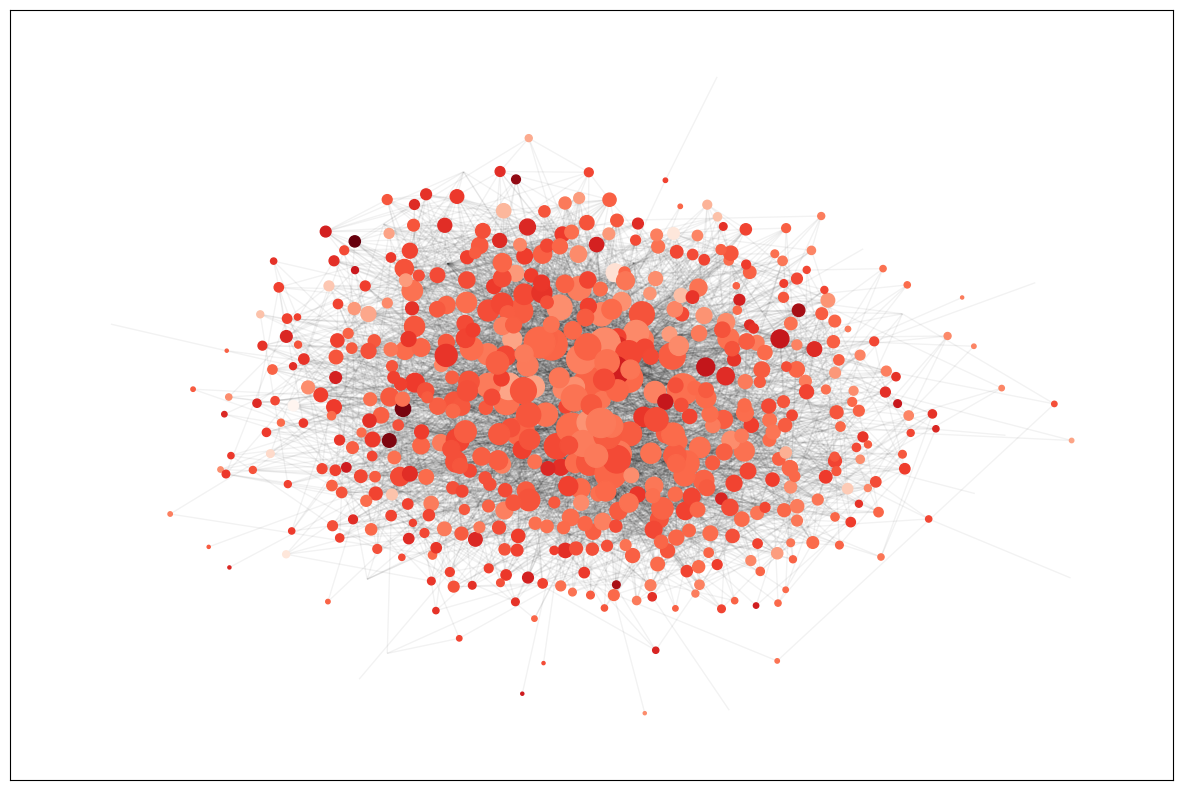

In [19]:
import networkx as nx

G = nx.DiGraph()

# Iterate over the nodes in the network
def clean_name(name):
    return re.sub(r'[\\/*?:"<>|]', "_", name).replace(" ", "_")

all_performers = [clean_name(os.path.splitext(os.path.basename(f))[0]) for f in all_paths]
performer_set = set(all_performers)

matching_links_collection = {}

for file_path in all_paths:
    performer = clean_name(os.path.splitext(os.path.basename(file_path))[0])
    
    with open(file_path, "rb") as f:
        wikitext = pickle.load(f)

    all_links = re.findall(r"\[\[(.*?)\]\]", wikitext)
    filtered_links = []

    for link in all_links:
        if any(x in link for x in ["File", "Image", "Special", "Category", "rock music"]):
            continue
        
        clean_link = clean_name(re.split(r'\|', link)[-1])
        if clean_link != performer and clean_link in performer_set:
            filtered_links.append(clean_link)
    
    matching_links_collection[performer] = filtered_links

for performer in all_performers:
    # Build the path to the correct file for this performer
    file_path = os.path.join(directory, f"{performer}.pkl")
    
    with open(file_path, "rb") as f:
        text = pickle.load(f)
        length_of_content = len(text.split())  # simpler and more accurate word count

    # Add performer node with word_count attribute
    G.add_node(performer, length_of_content=length_of_content, word_count=length_of_content)

    # Add edges to linked performers
    for target in matching_links_collection.get(performer, []):
        G.add_edge(performer, target)

for performer in all_performers:
    # Build the path to the correct file for this performer
    file_path = os.path.join(directory, f"{performer}.pkl")
    
    with open(file_path, "rb") as f:
        text = pickle.load(f)
        length_of_content = len(text.split())  # simpler and more accurate word count

    # Add performer node with word_count attribute
    G.add_node(performer, length_of_content=length_of_content, word_count=length_of_content)

    # Add edges to linked performers
    for target in matching_links_collection.get(performer, []):
        G.add_edge(performer, target)

    # Final clean ups:
isolated = list(nx.isolates(G))

G.remove_nodes_from(isolated)

cleaned_sentiment_results = {clean_name(k): v for k, v in sentiment_dict.items()}
for performer, score in cleaned_sentiment_results.items():
    if performer in G.nodes:
        G.nodes[performer]['sentiment'] = score

# Now we actually visualize the graph:
import matplotlib.pyplot as plt

G_undirected = G.to_undirected()

G_nodes = list(G_undirected.nodes())
G_degrees = [G_undirected.degree(node) for node in G_nodes]
# We would also like the word count for illustration purposes:
G_length_of_content = [G_undirected.nodes[node]['length_of_content'] for node in G_nodes]
G_sentiments = [G_undirected.nodes[node]['sentiment'] for node in G_nodes]

# Plot:
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_undirected,
                                     pos,
                                     nodelist = G_nodes, 
                                     node_size=[d*5 for d in G_degrees],
                                     node_color=G_sentiments,
                                     cmap=plt.cm.Reds)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.05)
plt.show()

> **Remember histograms? Create a histogram of all of the artists's associated page-sentiments. (And make it a nice histogram - use your histogram making skills from Week 2). Add the mean, meadian, ect from above to your plot.**

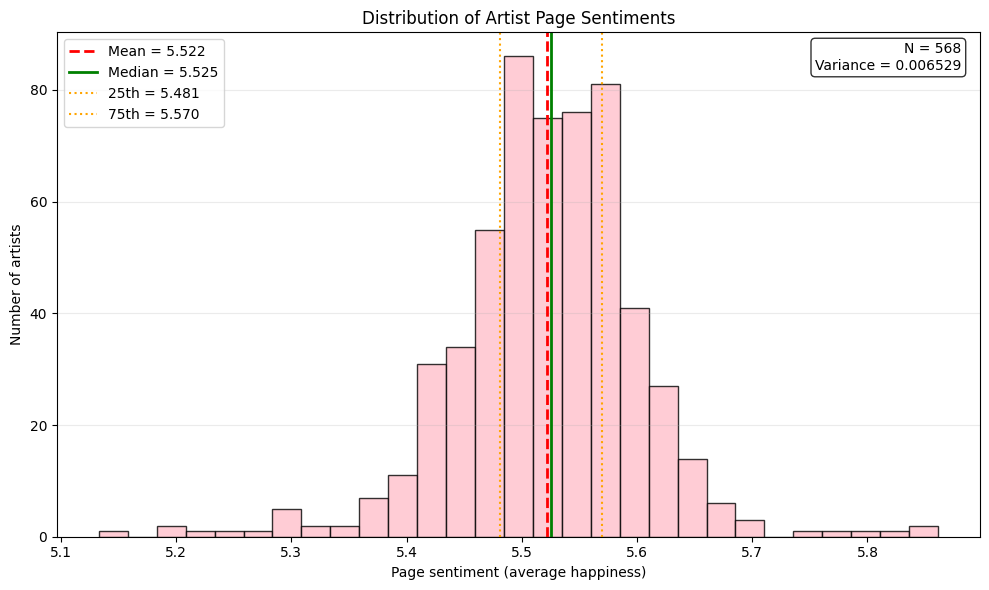

In [33]:
# Histogram of artist page sentiments with summary stats annotated
sentiments = sentiment_result['sentiment'].dropna()

plt.figure(figsize=(10, 6))
bins = np.linspace(sentiments.min(), sentiments.max(), 30)
plt.hist(sentiments, bins=bins, color='pink', edgecolor='k', alpha=0.8)

# Stats (from earlier calculations)
mean = store_stats['mean']
median = store_stats['median']
var = store_stats['variance']
p25 = store_stats['25th_percentile']
p75 = store_stats['75th_percentile']
n = len(sentiments)

# Vertical lines for mean, median and percentiles
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.3f}')
plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f'Median = {median:.3f}')
plt.axvline(p25, color='orange', linestyle=':', linewidth=1.5, label=f'25th = {p25:.3f}')
plt.axvline(p75, color='orange', linestyle=':', linewidth=1.5, label=f'75th = {p75:.3f}')

# Text box with additional stats
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
textstr = f'N = {n}\nVariance = {var:.6f}'
plt.gca().text(0.98, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=props)

plt.title("Distribution of Artist Page Sentiments")
plt.xlabel("Page sentiment (average happiness)")
plt.ylabel("Number of artists")
plt.legend()
plt.grid(axis='y', alpha=0.25)
plt.tight_layout()
plt.show()

> **Who are the 10 artists with happiest and saddest pages?**

In [24]:
# List the 10 happiest and 10 saddest artist pages by sentiment
sr = sentiment_result.dropna(subset=['sentiment']).copy()
sr['sentiment'] = sr['sentiment'].astype(float)

happiest_10 = sr.sort_values('sentiment', ascending=False).head(10).reset_index(drop=True)
saddest_10  = sr.sort_values('sentiment', ascending=True).head(10).reset_index(drop=True)

print("Top 10 happiest pages:")
print(happiest_10[['artist', 'sentiment']].assign(sentiment=lambda df: df['sentiment'].map('{:.3f}'.format)).to_string(index=False))

print("\nTop 10 saddest pages:")
print(saddest_10[['artist', 'sentiment']].assign(sentiment=lambda df: df['sentiment'].map('{:.3f}'.format)).to_string(index=False))

Top 10 happiest pages:
       artist sentiment
     Chevelle     5.861
         Live     5.838
       Pixies     5.826
     Daughtry     5.799
   Uriah_Heep     5.765
 The_Boxtones     5.759
          Yes     5.698
      Journey     5.691
Lenny_Kravitz     5.691
     Survivor     5.685

Top 10 saddest pages:
   artist sentiment
  Garbage     5.133
   Poison     5.197
    Keane     5.198
  Anthrax     5.219
Everclear     5.239
  Traffic     5.275
      311     5.285
     Hole     5.297
 Interpol     5.300
    Ghost     5.302



*Exercise*: Community sentiment distribution. 
  
> * Last week we calculated the stuctural communities of the graph. For this exercise, we use those communities (just the 10 largest ones). Specifically, you should calculate the average the average sentiment of the nodes in each community to find a *community level sentiment*. 
>   - Name each community by its three most connected bands. (Or feed the list of bands in each community and ask the LLM to come up with a good name for the community).
>   - What are the three happiest communities? 
>   - what are the three saddest communities?
>   - Do these results confirm what you can learn about each community by comparing to the genres, checking out the word-clouds for each community, and reading the wiki-pages? 
> * Compare the sentiment of the happiest and saddest communities to the overall (entire network) distribution of sentiment that you calculated in the previous exercise. Are the communities very differenct from the average? Or do you find the sentiment to be quite similar across all of the communities?

<div class="alert alert-block alert-info">
As above, feel free to go nuts with help from an LLM with this exercise for the technical parts. But try to answer the questions about interpreting the results with your own human brain.
</div>

**Note**: Calculating sentiment may take a long time, so arm yourself with patience as your code runs (remember to check that it runs correctly, before waiting patiently). Further, these tips may speed things up. And save somewhere, so you don't have to start over.

**Tips for speed**
* If you use `freqDist` prior to finding the sentiment, you only have to find it for every unique word and hereafter you can do a weighted mean.
* More tips for speeding up loops https://wiki.python.org/moin/PythonSpeed/PerformanceTips#Loops